In [6]:
import pandas as pd
import csv
from preprocessing.load_data import download_and_load_sts_data, download_and_load_sick_dataset

sts_train = pd.read_csv("/home/tharindu/Data/STS/sts-train.csv", sep="\t", quoting=csv.QUOTE_ALL)
sts_train[:10]



ParserError: Error tokenizing data. C error: Expected 7 fields in line 2508, saw 8


<Figure size 432x288 with 0 Axes>

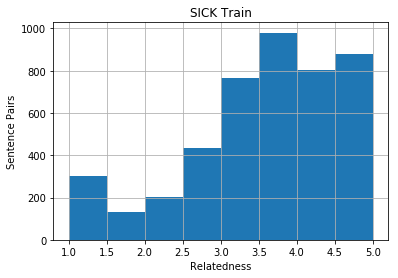

In [49]:
import matplotlib.pyplot as plt

fig = plt.figure()
sick_train.hist(column="sim", bins=[1,1.5,2,2.5,3,3.5,4,4.5,5])
plt.xlabel("Relatedness")
plt.ylabel("Sentence Pairs")
plt.title('SICK Train')
plt.savefig('sick_train.png')


<Figure size 432x288 with 0 Axes>

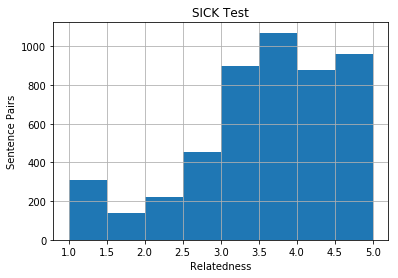

In [50]:
import matplotlib.pyplot as plt

fig = plt.figure()
sick_test.hist(column="sim", bins=[1,1.5,2,2.5,3,3.5,4,4.5,5])
plt.xlabel("Relatedness")
plt.ylabel("Sentence Pairs")
plt.title('SICK Test')
plt.savefig('sick_test.png')

In [51]:
sick_train.describe()



,sim
count,4500.000000
mean,3.520946
std,1.025235
min,1.000000
25%,3.000000
50%,3.692500
75%,4.300000
max,5.000000


/home/tharindu/anaconda3/envs/sentence_similarity_3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/tharindu/anaconda3/envs/sentence_similarity_3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


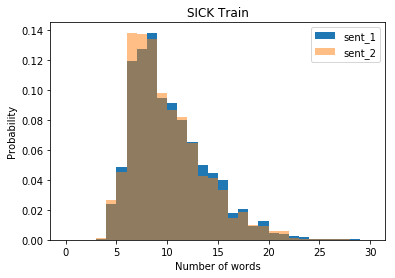

In [52]:
import pandas as pd

sent_1_qs = pd.Series(sick_train['sent_1'].tolist())
sent_2_qs = pd.Series(sick_train['sent_2'].tolist())

dist_sent_1 = sent_1_qs.apply(lambda x: len(x.split(' ')))
dist_sent_2 = sent_2_qs.apply(lambda x: len(x.split(' ')))

plt.figure()
plt.hist(dist_sent_1, bins=30, range=[0, 30], normed=True, label='sent_1')
plt.hist(dist_sent_2, bins=30, range=[0, 30], normed=True, alpha=0.5, label='sent_2')
plt.title('SICK Train')
plt.legend()
plt.xlabel('Number of words')
plt.ylabel('Probability')
plt.savefig('sick_train_words.png')

In [53]:
print('mean-sent_1 {:.2f} std-sent_1 {:.2f} mean-sent_2 {:.2f} std-sent_2 {:.2f} max-sent_1 {:.2f} max-sent_2 {:.2f} min-sent_1 {:.2f} min-sent_2 {:.2f}'.format(dist_sent_1.mean(),
                          dist_sent_1.std(), dist_sent_2.mean(), dist_sent_2.std(), dist_sent_1.max(), dist_sent_2.max(), dist_sent_1.min(), dist_sent_2.min()))

mean-sent_1 9.73 std-sent_1 3.69 mean-sent_2 9.52 std-sent_2 3.65 max-sent_1 28.00 max-sent_2 32.00 min-sent_1 3.00 min-sent_2 3.00


/home/tharindu/anaconda3/envs/sentence_similarity_3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/tharindu/anaconda3/envs/sentence_similarity_3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


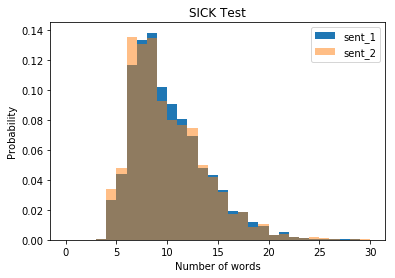

In [72]:
import pandas as pd

sent_1_qs = pd.Series(sick_test['sent_1'].tolist())
sent_2_qs = pd.Series(sick_test['sent_2'].tolist())

# dist_sent_1 = sent_1_qs.apply(len)
# dist_sent_2 = sent_2_qs.apply(len)

dist_sent_1 = sent_1_qs.apply(lambda x: len(x.split(' ')))
dist_sent_2 = sent_2_qs.apply(lambda x: len(x.split(' ')))

plt.figure()
plt.hist(dist_sent_1, bins=30, range=[0, 30], normed=True, label='sent_1')
plt.hist(dist_sent_2, bins=30, range=[0, 30], normed=True, alpha=0.5, label='sent_2')
plt.title('SICK Test')
plt.legend()
plt.xlabel('Number of words')
plt.ylabel('Probability')
plt.savefig('sick_test_words.png')

In [ ]:
print('mean-sent_1 {:.2f} std-sent_1 {:.2f} mean-sent_2 {:.2f} std-sent_2 {:.2f} max-sent_1 {:.2f} max-sent_2 {:.2f} min-sent_1 {:.2f} min-sent_2 {:.2f}'.format(dist_sent_1.mean(),
                          dist_sent_1.std(), dist_sent_2.mean(), dist_sent_2.std(), dist_sent_1.max(), dist_sent_2.max(), dist_sent_1.min(), dist_sent_2.min()))


In [55]:
def normalized_word_share(row):
    w1 = set(map(lambda word: word.lower().strip(), row['sent_1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['sent_2'].split(" ")))
    return 1.0 * len(w1 & w2)/(len(w1) + len(w2))




In [56]:
def transform(x):
    if x<=2:
        return "1-2"
    elif 2<x<=3:
        return "2-3"
    elif 3<x<=4:
        return "3-4"
    elif 4<x<=5:
        return "4-5"

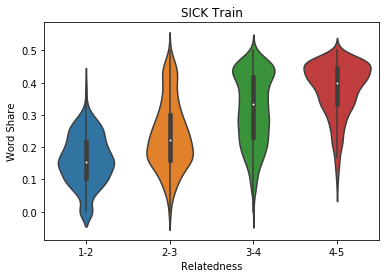

In [71]:
import seaborn as sns

sick_train.sort_values('sim')

sick_train['sim_bucket'] = sick_train.apply(lambda x: transform(x['sim']), axis=1)
sick_train['word_share'] = sick_train.apply(normalized_word_share, axis=1)

sick_train.head()
plt.figure()
sns.violinplot(x = sick_train['sim_bucket'], y = sick_train['word_share'], order=["1-2", "2-3", "3-4", "4-5"])
plt.xlabel("Relatedness")
plt.ylabel("Word Share")
plt.title('SICK Train')
plt.savefig('sick_train_word_share.png')



/home/tharindu/anaconda3/envs/sentence_similarity_3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


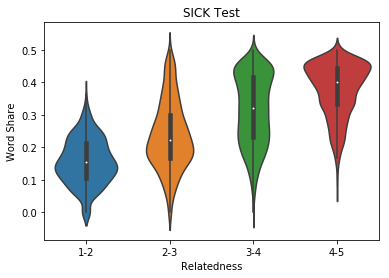

In [61]:
import seaborn as sns

sick_test.sort_values('sim')

sick_test['sim_bucket'] = sick_test.apply(lambda x: transform(x['sim']), axis=1)
sick_test['word_share'] = sick_test.apply(normalized_word_share, axis=1)

sick_test.head()
plt.figure()
sns.violinplot(x = sick_test['sim_bucket'], y = sick_test['word_share'], order=["1-2", "2-3", "3-4", "4-5"])
plt.xlabel("Relatedness")
plt.ylabel("Word Share")
plt.title('SICK Test')
plt.savefig('sick_test_word_share.png')



